In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drake-lyrics/drake_data.csv
/kaggle/input/drake-lyrics/drake_lyrics.txt
/kaggle/input/drake-lyrics/drake_data.json


In [3]:
df = pd.read_csv('/kaggle/input/drake-lyrics/drake_data.csv')

In [4]:
df.columns

Index(['album', 'lyrics_title', 'lyrics_url', 'lyrics', 'track_views'], dtype='object')

In [5]:
import re
spaces = r"\s+"
print(re.split(spaces, df["lyrics"][1]))
print(re.findall("me", df["lyrics"][1]))

['[Verse]', 'Hands', 'are', 'tied', "Someone's", 'in', 'my', 'ear', 'from', 'the', 'other', 'side', "Tellin'", 'me', 'that', 'I', 'should', 'pay', 'you', 'no', 'mind', 'Wanted', 'you', 'to', 'not', 'be', 'with', 'me', 'all', 'night', 'Wanted', 'you', 'to', 'not', 'stay', 'with', 'me', 'all', 'night', 'I', 'know,', 'you', 'know,', 'who', 'that', 'person', 'is', 'to', 'me', "Doesn't", 'really', 'change', 'things', '[Chorus]', 'I', 'know', "you're", 'scared', 'of', 'dating,', 'falling', 'for', 'me', 'Shorty,', 'surely', 'you', 'know', 'me', 'Right', 'here', 'for', 'you', 'always', 'You', 'know,', 'I', "don't", 'ever', 'change', 'Right', 'here', 'for', 'you', 'always', 'You', 'know', 'I', "don't", 'ever', 'change', 'Right', 'here', 'for', 'you', '[Bridge]', 'In', 'mind', 'you', 'make', 'me', 'want', 'to', 'do', 'things,', 'love', 'you', 'Like', "I'm", 'supposed', 'to', 'You', 'make', 'me', 'want', 'to', 'love', 'you', 'Like', "I'm", 'supposed', 'to', 'You', 'make', 'me', 'want', 'to', 'lov

In [6]:
six_count = []
for i in range(len(df)):
    if isinstance(df.loc[i, "lyrics"], str):
        count = len(re.findall("six", df.loc[i, "lyrics"]))
        count += len(re.findall("6", df.loc[i, "lyrics"]))
        six_count.append(count)
    else:
        six_count.append(np.nan)

df['six_count'] = six_count
df.sort_values(by=['six_count'], na_position='last', ascending=False)


,album,lyrics_title,lyrics_url,lyrics,track_views,six_count
118,If You’re Reading This It’s Too Late,6 God Lyrics,https://genius.com/Drake-6-god-lyrics,[Produced by Boi-1da and SykSense]\n\n[Intro]\...,1.5M,8.0
115,If You’re Reading This It’s Too Late,Know Yourself Lyrics,https://genius.com/Drake-know-yourself-lyrics,"[Part 1]\n\n[Intro]\nHol' it yute, hol' it, ho...",5M,8.0
21,Dark Lane Demo Tapes,Demons (Ft. Fivio Foreign & Sosa Geek) Lyrics,https://genius.com/Drake-demons-lyrics,[Intro: Drake & Fivio Foreign]\nLike what?\n(W...,258K,5.0
233,Comeback Season,New Shit (Ft. Phonte & Von Pea) Lyrics,https://genius.com/Drake-new-shit-lyrics,"[Verse 1: Drake]\nCheck (Nottz, Nottz, Nottz)\...",9.9K,4.0
20,Dark Lane Demo Tapes,From Florida With Love Lyrics,https://genius.com/Drake-from-florida-with-lov...,"[Intro]\n(Plugg)\n(Bitch)\nAyy, yeah\n\n[Verse...",222.3K,4.0
...,...,...,...,...,...,...
127,If You’re Reading This It’s Too Late,Jungle Lyrics,https://genius.com/Drake-jungle-lyrics,[Chorus: Gabriel Garzón Montano]\nRock me real...,2.5M,0.0
128,If You’re Reading This It’s Too Late,6PM in New York Lyrics,https://genius.com/Drake-6pm-in-new-york-lyrics,"[Intro]\nYeah\nYeah\n\n[Verse]\nOh, you gotta ...",1.1M,0.0
289,Unreleased Songs,Real Bad Karma (Ft. Bryson Tiller) Lyrics,https://genius.com/Drake-real-bad-karma-lyrics,[Intro: Drake]\n(Sonorous on the beat)\nAnd I ...,50.6K,0.0
184,Thank Me Later,Thank Me Later [Booklet] Lyrics,https://genius.com/Drake-thank-me-later-bookle...,NaN,6.2K,NaN


In [7]:
fuck_count = []
for i in range(len(df)):
    if isinstance(df.loc[i, "lyrics"], str):
        count = len(re.findall("fuck", df.loc[i, "lyrics"]))
        fuck_count.append(count)
    else:
        fuck_count.append(np.nan)

df['fuck_count'] = fuck_count
df.sort_values(by=['fuck_count'], na_position='last', ascending=False)

,album,lyrics_title,lyrics_url,lyrics,track_views,six_count,fuck_count
259,Unreleased Songs,Fuckin' Problems (Lost Verse) by Kendrick Lama...,https://genius.com/Kendrick-lamar-fuckin-probl...,"[Intro: Kendrick Lamar]\nI remember, being you...",17.4K,0.0,32.0
23,Care Package,Dreams Money Can Buy Lyrics,https://genius.com/Drake-dreams-money-can-buy-...,"[Intro: Jai Paul]\nOoh-ooh-ooh, ooh-ooh-ooh-oo...",548.8K,1.0,30.0
136,Nothing Was the Same,Worst Behavior Lyrics,https://genius.com/Drake-worst-behavior-lyrics,[Produced by DJ Dahi]\n\n[Verse 1]\nWorst...\n...,2.3M,0.0,21.0
187,So Far Gone (EP),Best I Ever Had Lyrics,https://genius.com/Drake-best-i-ever-had-lyrics,"[Intro]\nYou know, a lot of girls be\nThinkin'...",1.3M,0.0,19.0
201,So Far Gone,Best I Ever Had Lyrics,https://genius.com/Drake-best-i-ever-had-lyrics,"[Intro]\nYou know, a lot of girls be\nThinkin'...",1.3M,0.0,19.0
...,...,...,...,...,...,...,...
63,Scorpion,Don't Matter to Me by Drake & Michael Jackson ...,https://genius.com/Drake-and-michael-jackson-d...,"[Verse 1: Drake]\nAyy, wild things you're doin...",914.8K,0.0,0.0
58,Scorpion,Finesse Lyrics,https://genius.com/Drake-finesse-lyrics,"[Intro]\nYeah, turn everything up\nYeah, oh ye...",576.1K,0.0,0.0
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K,0.0,0.0
184,Thank Me Later,Thank Me Later [Booklet] Lyrics,https://genius.com/Drake-thank-me-later-bookle...,NaN,6.2K,NaN,NaN


In [8]:
b_count = []
for i in range(len(df)):
    if isinstance(df.loc[i, "lyrics"], str):
        count = len(re.findall("bitch", df.loc[i, "lyrics"]))
        b_count.append(count)
    else:
        b_count.append(np.nan)

df['b_count'] = b_count
df.sort_values(by=['b_count'], na_position='last', ascending=False)

,album,lyrics_title,lyrics_url,lyrics,track_views,six_count,fuck_count,b_count
259,Unreleased Songs,Fuckin' Problems (Lost Verse) by Kendrick Lama...,https://genius.com/Kendrick-lamar-fuckin-probl...,"[Intro: Kendrick Lamar]\nI remember, being you...",17.4K,0.0,32.0,10.0
174,Thank Me Later,Up All Night (Ft. Nicki Minaj) Lyrics,https://genius.com/Drake-up-all-night-lyrics,"[Verse 1: Drake]\nKush rolled, glass full: I p...",489.2K,2.0,4.0,8.0
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K,0.0,0.0,7.0
168,Take Care,The Motto (Remix) (Ft. Lil Wayne & Tyga) Lyrics,https://genius.com/Drake-the-motto-remix-lyrics,[Produced by T-Minus]\n\n[Verse 1: Drake]\nI'm...,336.1K,0.0,8.0,7.0
21,Dark Lane Demo Tapes,Demons (Ft. Fivio Foreign & Sosa Geek) Lyrics,https://genius.com/Drake-demons-lyrics,[Intro: Drake & Fivio Foreign]\nLike what?\n(W...,258K,5.0,1.0,7.0
...,...,...,...,...,...,...,...,...
115,If You’re Reading This It’s Too Late,Know Yourself Lyrics,https://genius.com/Drake-know-yourself-lyrics,"[Part 1]\n\n[Intro]\nHol' it yute, hol' it, ho...",5M,8.0,1.0,0.0
117,If You’re Reading This It’s Too Late,Madonna Lyrics,https://genius.com/Drake-madonna-lyrics,"[Produced by Noah ""40"" Shebib]\n\n[Chorus]\nBr...",794.7K,2.0,0.0,0.0
289,Unreleased Songs,Real Bad Karma (Ft. Bryson Tiller) Lyrics,https://genius.com/Drake-real-bad-karma-lyrics,[Intro: Drake]\n(Sonorous on the beat)\nAnd I ...,50.6K,0.0,1.0,0.0
184,Thank Me Later,Thank Me Later [Booklet] Lyrics,https://genius.com/Drake-thank-me-later-bookle...,NaN,6.2K,NaN,NaN,NaN


# Explore Track Views

In [9]:
df = df.drop(df.index[df['track_views'] == "(Unreleased)"].tolist())
df.drop_duplicates(subset ="lyrics_title", keep = 'first', inplace = True) 

df.track_views = (df.track_views.replace(r'[KM]+$', '', regex=True).astype(float) * df.track_views.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

Binary Encoding

dummies = df.lyrics.str.get_dummies(sep=' ')
dummies = dummies.loc[:,dummies.sum() > 5]

"""Clean binary encoding"""
remove = [col for col in dummies.columns if "\n" in col]
clean_names = [song for song in dummies.columns.tolist() if song not in remove]
dummies = dummies.loc[:,clean_names]

Word Counts

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
df = df.dropna()
countvec = CountVectorizer(token_pattern=r"(?u)\b[a-zA-Z0-9_']+\b")
counts = countvec.fit_transform(df['lyrics'].tolist())
dummy_all = pd.DataFrame(counts.toarray(), columns=countvec.get_feature_names())


"""Clean Counts"""
dummy = dummy_all.loc[:,dummy_all[dummy_all > 0].count() > 2]
remove = [col for col in dummy.columns if "\n" in col]
clean_names = [word for word in dummy.columns.tolist() if word not in remove]
labels = ["verse", "intro", "chorus", "outro", "\n"]
clean_names = [word for word in clean_names if word not in labels]
dummy = dummy.loc[:,clean_names]

In [47]:
import numpy as np
s_corr = dummy.corrwith(np.log(df.track_views))
s_corr.max()
s_corr.sort_values(ascending=False)

produced    0.239919
shit        0.210522
who         0.205247
pussy       0.194450
ovo         0.186571
              ...   
chicks     -0.272281
chick      -0.281301
uh         -0.287952
its        -0.314106
hook       -0.371744
Length: 2740, dtype: float64

In [12]:
import matplotlib.pyplot as plt
top_ten = s_corr.sort_values(ascending=False)[0:10]
bottom_ten = s_corr.sort_values(ascending=True)[0:10]


(array([20., 18., 15., 15., 14., 35., 55., 56., 25.,  6.]),
 array([ 8.68270763,  9.40999454, 10.13728145, 10.86456836, 11.59185527,
        12.31914218, 13.04642908, 13.77371599, 14.5010029 , 15.22828981,
        15.95557672]),
 <a list of 10 Patch objects>)

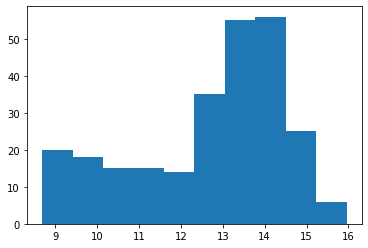

In [32]:
plt.hist(np.log(df.track_views))

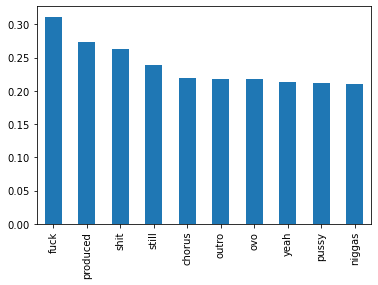

In [13]:
top_ten.plot.bar(x='Word', y='Correlation to Views')


In [53]:
df.loc[(dummy_all["produced"] > 0).values,:]

,album,lyrics_title,lyrics_url,lyrics,track_views,six_count,fuck_count,b_count
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38800.0,0.0,0.0,0.0
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129800.0,0.0,0.0,7.0
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72100.0,0.0,2.0,1.0
5,Certified Lover Boy,Laugh Now Cry Later (Ft. Lil Durk) Lyrics,https://genius.com/Drake-laugh-now-cry-later-l...,"[Intro: Drake]\nWoah, woah\nYeah\n\n[Chorus: D...",1000000.0,0.0,0.0,0.0
6,Certified Lover Boy,Lie To Me Lyrics,https://genius.com/Drake-lie-to-me-lyrics,"[Intro: Pimp C]\nMan, get the fuck away from u...",34500.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...
277,Unreleased Songs,Slow Motion by Usher (Ft. Drake) Lyrics,https://genius.com/Usher-slow-motion-lyrics,[Intro: Usher]\nWhat you doin'? What you doin'...,6800.0,0.0,1.0,0.0
279,Unreleased Songs,Stay Down (Ft. Busta Rhymes) Lyrics,https://genius.com/Drake-stay-down-lyrics,"[Intro: Drake]\nUh-uh, yeah\nUh\n\n[Chorus: Dr...",5900.0,0.0,1.0,2.0
282,Unreleased Songs,Don’t Run Lyrics,https://genius.com/Drake-dont-run-lyrics,[Intro]\nYeah\n\n[Verse 1]\nSent a message to ...,19400.0,2.0,0.0,0.0
284,Unreleased Songs,Not Nice Lyrics,https://genius.com/Drake-not-nice-lyrics,[Intro: Drake]\nOh-oh-oh-oh\nOh-oh-oh-oh\n\n[V...,14900.0,0.0,0.0,0.0


In [15]:
len(dummy_all.columns), len(dummy.columns)

(8643, 2744)